# Loading packages

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Loading dataset

In [594]:
data = pd.read_csv('eca_dataset_final.csv')
data.head()

,Gender,Age,AccountWeeks,Subscription,Reviews,AvgRides,AvgSpend,LastRating,Churn
0,Female,26,157,Yes,My Order ADR-5838292-8-257. I made it 5.30pm. ...,29,156,4,No
1,Male,22,10,No,I think Grab should make it clear that all del...,15,196,2,No
2,Female,59,65,No,I've been trying to order grabfood since 4.45p...,8,181,3,Yes
3,Female,32,82,No,WE SHOULD BOYCOTT GRAB LOUSLY FARES NO INCENTI...,21,103,1,Yes
4,Male,35,95,No,Hi Sir Anthony Tan I would like to enquire wi...,19,40,5,Yes


In [174]:
len(data)

392

# Data Quality

In [175]:
data.isnull()

,Gender,Age,AccountWeeks,Subscription,Reviews,AvgRides,AvgSpend,LastRating,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
387,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False
389,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False


In [287]:
# check for duplicate rows
duplicate_row = data[data.duplicated()]
duplicate_row

,Gender,Age,AccountWeeks,Subscription,Reviews,AvgRides,AvgSpend,LastRating,Churn,Vader_Sentiment


# Data Exploration

In [176]:
len(data[data['Churn'] == 'Yes']) / len(data)

0.3826530612244898

In [177]:
def count_labels(df, labels):
    df_count = []
    
    for i in labels:
        df_count.append(sum(df == i))
        
    return df_count

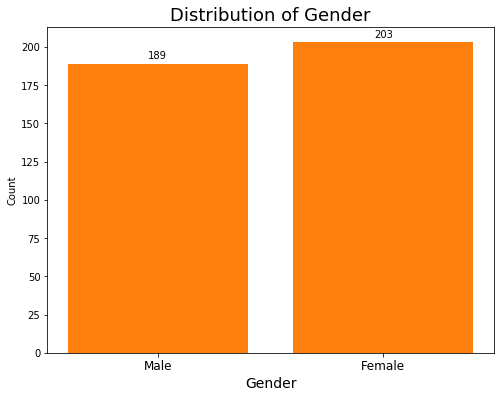

In [178]:
labels_g = ['Male', 'Female']
count_label_g = count_labels(data['Gender'], labels_g)

x = np.arange(len(labels_g)) # label locations
width = 0.35

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, count_label_g, width)
# rects2 = ax.bar(x + width / 2, bert_count, width, label='BERT')

# adding labels
ax.set_ylabel('Count')
ax.set_xlabel('Gender', fontsize=14)
ax.set_title('Distribution of Gender', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels_g, fontsize=12)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

plt.bar(x, count_label_g)
plt.xticks(x, labels_g)

# fig.tight_layout()

plt.savefig('gender_dist.png')
plt.show()

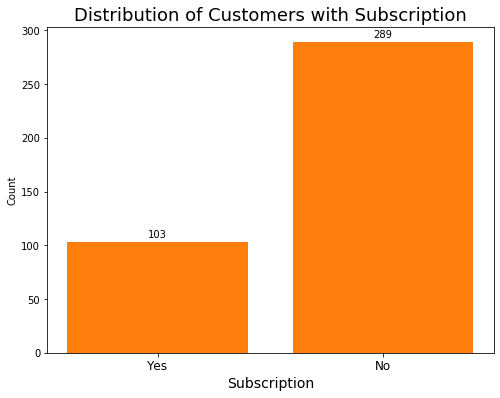

In [179]:
labels = ['Yes', 'No']
count_label_sub = count_labels(data['Subscription'], labels)

x = np.arange(len(labels)) # label locations
width = 0.35

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, count_label_sub, width)
# rects2 = ax.bar(x + width / 2, bert_count, width, label='BERT')

# adding labels
ax.set_ylabel('Count')
ax.set_xlabel('Subscription', fontsize=14)
ax.set_title('Distribution of Customers with Subscription', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

plt.bar(x, count_label_sub)
plt.xticks(x, labels)

# fig.tight_layout()

plt.savefig('subscription_dist.png')
plt.show()

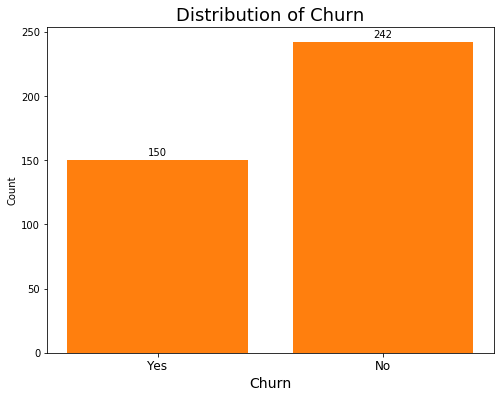

In [180]:
# labels = ['Yes', 'No']
count_label_sub = count_labels(data['Churn'], labels)

x = np.arange(len(labels)) # label locations
width = 0.35

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, count_label_sub, width)
# rects2 = ax.bar(x + width / 2, bert_count, width, label='BERT')

# adding labels
ax.set_ylabel('Count')
ax.set_xlabel('Churn', fontsize=14)
ax.set_title('Distribution of Churn', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

plt.bar(x, count_label_sub)
plt.xticks(x, labels)

# fig.tight_layout()

plt.savefig('churn_dist.png')
plt.show()

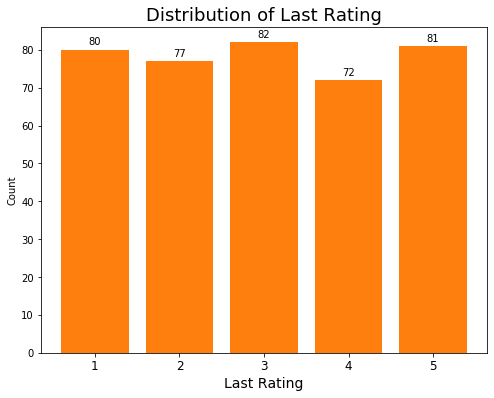

In [181]:
labels_rating = [1, 2, 3, 4, 5]
count_label_rating = count_labels(data['LastRating'], labels_rating)

x = np.arange(len(labels_rating)) # label locations
width = 0.35

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, count_label_rating, width)
# rects2 = ax.bar(x + width / 2, bert_count, width, label='BERT')

# adding labels
ax.set_ylabel('Count')
ax.set_xlabel('Last Rating', fontsize=14)
ax.set_title('Distribution of Last Rating', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels_rating, fontsize=12)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

plt.bar(x, count_label_rating)
plt.xticks(x, labels_rating)

# fig.tight_layout()

plt.savefig('last_rating_dist.png')
plt.show()

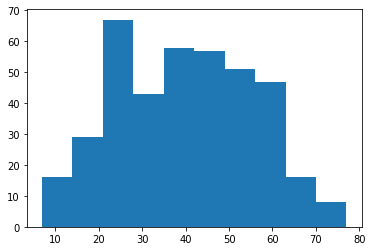

In [182]:
plt.hist(data['Age'])
plt.show()

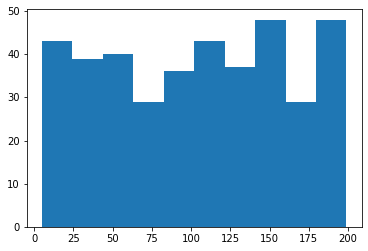

In [183]:
plt.hist(data['AvgSpend'])
plt.show()

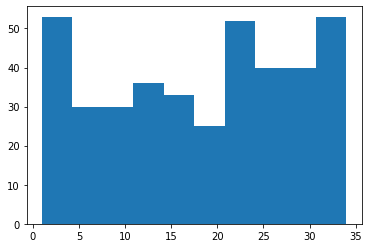

In [184]:
plt.hist(data['AvgRides'])
plt.show()

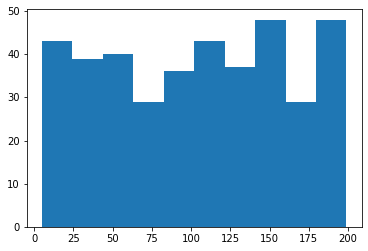

In [185]:
plt.hist(data['AvgSpend'])
plt.show()

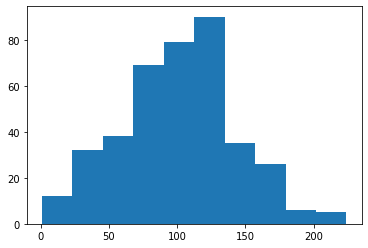

In [186]:
plt.hist(data['AccountWeeks'])
plt.show()

# Sentiment Analysis with Vader

In [608]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(df_column):
    sentiment_result = []
    
    for review in df_column:
        vs = analyzer.polarity_scores(review)
        
        if vs['compound'] >= 0.05:
            sentiment_result.append('pos')
            
        elif vs['compound'] <= -0.05:
            sentiment_result.append('neg')
            
        else:
            sentiment_result.append('neu')
            
    return sentiment_result

In [609]:
data['LastReview'] = vader_sentiment(data['Reviews'])

In [610]:
data['LastReview'].value_counts()

pos    191
neg    144
neu     57
Name: LastReview, dtype: int64

In [611]:
data.head()

,Gender,Age,AccountWeeks,Subscription,Reviews,AvgRides,AvgSpend,LastRating,Churn,LastReview
0,Female,26,157,Yes,My Order ADR-5838292-8-257. I made it 5.30pm. ...,29,156,4,No,neu
1,Male,22,10,No,I think Grab should make it clear that all del...,15,196,2,No,pos
2,Female,59,65,No,I've been trying to order grabfood since 4.45p...,8,181,3,Yes,neg
3,Female,32,82,No,WE SHOULD BOYCOTT GRAB LOUSLY FARES NO INCENTI...,21,103,1,Yes,neg
4,Male,35,95,No,Hi Sir Anthony Tan I would like to enquire wi...,19,40,5,Yes,pos


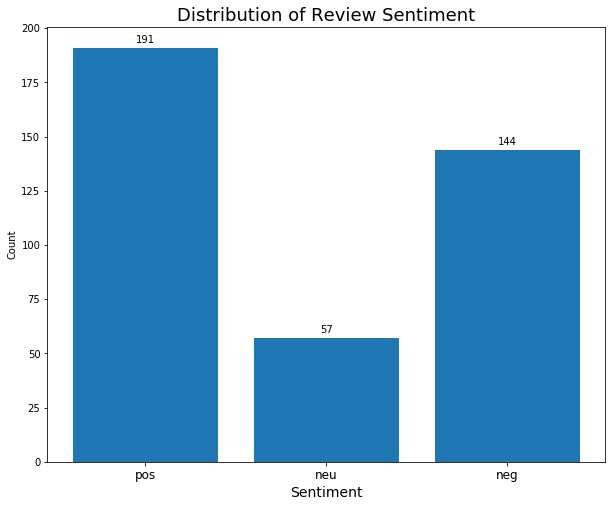

In [320]:
label_sentiment = ['pos', 'neu', 'neg']
count_label = count_labels(data['LastReview'], label_sentiment)

x = np.arange(len(label_sentiment)) # label locations
width = 0.35

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, count_label, width, color='blue')
# rects2 = ax.bar(x + width / 2, bert_count, width, label='BERT')

# adding labels
ax.set_ylabel('Count')
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_title('Distribution of Review Sentiment', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(label_sentiment, fontsize=12)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# autolabel(rects2)

plt.bar(x, count_label)
plt.xticks(x, label_sentiment)

# fig.tight_layout()

plt.savefig('review_sentiment_dist.png')
plt.show()

In [288]:
print(f'''
Number of null values in Gender: {sum(data['Gender'].isnull())}
Number of null values in Age: {sum(data['Age'].isnull())}
Number of null values in AccountWeeks: {sum(data['AccountWeeks'].isnull())}
Number of null values in Subscription: {sum(data['Subscription'].isnull())}
Number of null values in Reviews: {sum(data['Reviews'].isnull())}      
Number of null values in AvgRides: {sum(data['AvgRides'].isnull())}
Number of null values in AvgSpend: {sum(data['AvgSpend'].isnull())}
Number of null values in LastRating: {sum(data['LastRating'].isnull())}
Number of null values in Churn: {sum(data['Churn'].isnull())}
''')


Number of null values in Gender: 0
Number of null values in Age: 0
Number of null values in AccountWeeks: 0
Number of null values in Subscription: 0
Number of null values in Reviews: 0      
Number of null values in AvgRides: 0
Number of null values in AvgSpend: 0
Number of null values in LastRating: 0
Number of null values in Churn: 0



# Predicting Customer Churn

In [193]:
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Dropout, Bidirectional
from keras.constraints import maxnorm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [321]:
data.dtypes

Gender          object
Age              int64
AccountWeeks     int64
Subscription    object
Reviews         object
AvgRides         int64
AvgSpend         int64
LastRating       int64
Churn           object
LastReview      object
dtype: object

In [660]:
data['LastRating'] = data['LastRating'].astype('str')

In [695]:
X = data.drop(['Reviews', 'Churn'], axis=1)
Y = data['Churn']

In [696]:
numerical_ix = X.select_dtypes(include=['int64']).columns
categorical_ix = X.select_dtypes(include=['object']).columns

In [697]:
numerical_ix

Index(['Age', 'AccountWeeks', 'AvgRides', 'AvgSpend'], dtype='object')

In [698]:
X_num = X.select_dtypes(include=['int64'])
X_cat = X.select_dtypes(include=['object'])

In [699]:
X_cat = pd.get_dummies(X_cat)
X_cat.drop(['Gender_Female', 'Subscription_No', 'LastRating_5',
           'LastReview_pos'], axis=1, inplace=True)
X_cat

,Gender_Male,Subscription_Yes,LastRating_1,LastRating_2,LastRating_3,LastRating_4,LastReview_neg,LastReview_neu
0,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
387,0,0,0,1,0,0,0,0
388,1,0,0,0,0,0,1,0
389,0,0,0,0,0,0,1,0
390,0,0,0,0,1,0,0,0


In [343]:
x_num_mm

array([[0.27142857, 0.69955157, 0.84848485, 0.77835052],
       [0.21428571, 0.04035874, 0.42424242, 0.98453608],
       [0.74285714, 0.28699552, 0.21212121, 0.90721649],
       ...,
       [0.42857143, 0.35874439, 0.60606061, 0.74226804],
       [0.58571429, 0.51121076, 0.27272727, 0.06185567],
       [0.64285714, 0.39013453, 0.24242424, 0.12371134]])

In [700]:
minmax = MinMaxScaler()
x_num_mm = minmax.fit_transform(X_num)

In [701]:
X_num = pd.DataFrame(x_num_mm)
X_num.rename(columns={0: 'Age', 1: 'AccountWeeks', 
                      2: 'AvgRides', 3: 'AvgSpend'}, inplace=True)
X_num

,Age,AccountWeeks,AvgRides,AvgSpend
0,0.271429,0.699552,0.848485,0.778351
1,0.214286,0.040359,0.424242,0.984536
2,0.742857,0.286996,0.212121,0.907216
3,0.357143,0.363229,0.606061,0.505155
4,0.400000,0.421525,0.545455,0.180412
...,...,...,...,...
387,0.928571,0.511211,0.848485,0.221649
388,0.271429,0.430493,0.727273,0.123711
389,0.428571,0.358744,0.606061,0.742268
390,0.585714,0.511211,0.272727,0.061856


In [702]:
X_num['idx'] = range(0, len(X_num))
X_cat['idx'] = range(0, len(X_num))
X = X_num.join(X_cat.set_index('idx'), how='left', on='idx')

In [703]:
X.drop('idx', axis=1, inplace=True)

In [704]:
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
Y.reshape(-1, 1)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [478]:
from keras.utils import to_categorical

Y_onehot = to_categorical(Y)

### w/o sentiment

In [705]:
X_wo_sentiment = X.drop(['LastReview_neg', 'LastReview_neu'], axis=1)
X_wo_sentiment

,Age,AccountWeeks,AvgRides,AvgSpend,Gender_Male,Subscription_Yes,LastRating_1,LastRating_2,LastRating_3,LastRating_4
0,0.271429,0.699552,0.848485,0.778351,0,1,0,0,0,1
1,0.214286,0.040359,0.424242,0.984536,1,0,0,1,0,0
2,0.742857,0.286996,0.212121,0.907216,0,0,0,0,1,0
3,0.357143,0.363229,0.606061,0.505155,0,0,1,0,0,0
4,0.400000,0.421525,0.545455,0.180412,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
387,0.928571,0.511211,0.848485,0.221649,0,0,0,1,0,0
388,0.271429,0.430493,0.727273,0.123711,1,0,0,0,0,0
389,0.428571,0.358744,0.606061,0.742268,0,0,0,0,0,0
390,0.585714,0.511211,0.272727,0.061856,0,0,0,0,1,0


In [706]:
x_train_nos,x_test_nos,y_train,y_test = train_test_split(X_wo_sentiment,Y,test_size=0.3, random_state=42)

In [674]:
X.shape

(392, 12)

In [675]:
Y.shape

(392,)

## Trying sklearn

In [257]:
t = [('cat', OneHotEncoder(), categorical_ix), 
     ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [258]:
t_2 = [('cat', OneHotEncoder(), categorical_ix), 
     ('num', MinMaxScaler(), numerical_ix)]
col_transform_2 = ColumnTransformer(transformers=t_2)

In [707]:
model_nn = MLPClassifier(activation='tanh', solver='adam', alpha = 0.0002, learning_rate_init=0.005)
model_nn.fit(x_train_nos, y_train)
y_pred = model_nn.predict(x_test_nos)

In [711]:
print(f'Accuracy score for MLPClassifier: {accuracy_score(y_test, y_pred):.2f}')

Accuracy score for MLPClassifier: 0.56


In [710]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68        66
           1       0.50      0.19      0.28        52

    accuracy                           0.56       118
   macro avg       0.54      0.52      0.48       118
weighted avg       0.54      0.56      0.50       118



In [712]:
model_nb = MultinomialNB(alpha=2)
# pipe_nb = Pipeline([('prep', col_transform_2), ('m', model_nb)])
model_nb.fit(x_train_nos, y_train)
y_pred_nb = model_nb.predict(x_test_nos)
print(f'Accuracy score for Multinomial Naive Bayes model: {accuracy_score(y_test, y_pred_nb):.2f}')

Accuracy score for Multinomial Naive Bayes model: 0.56


In [713]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        66
           1       0.00      0.00      0.00        52

    accuracy                           0.56       118
   macro avg       0.28      0.50      0.36       118
weighted avg       0.31      0.56      0.40       118



/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [726]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_train_nos, y_train)
y_pred_logistic = logistic.predict(x_test_nos)

In [727]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        66
           1       1.00      0.08      0.14        52

    accuracy                           0.59       118
   macro avg       0.79      0.54      0.44       118
weighted avg       0.76      0.59      0.47       118



## Trying Keras

In [427]:
x_train_nos.shape[1]

10

In [731]:
model_nos = Sequential()
model_nos.add(Dense(32, input_dim=x_train_nos.shape[1], activation='relu'))
model_nos.add(Dropout(rate=0.2))
model_nos.add(Dense(64, activation='tanh'))
model_nos.add(Dropout(rate=0.2))
model_nos.add(Dense(1, activation='sigmoid'))
model_nos.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nos.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                352       
_________________________________________________________________
dropout_39 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 65        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [732]:
t_start = time.time()

history_nos = model_nos.fit(x_train_nos, y_train, epochs=100, batch_size=10)

t_end = time.time()
print(f'Model took {t_end-t_start} seconds to train.')

Epoch 1/100
274/274 [==============================] - 0s 758us/step - loss: 0.6705 - accuracy: 0.6168
Epoch 2/100
274/274 [==============================] - 0s 115us/step - loss: 0.6464 - accuracy: 0.6387
Epoch 3/100
274/274 [==============================] - 0s 107us/step - loss: 0.6332 - accuracy: 0.6350
Epoch 4/100
274/274 [==============================] - 0s 118us/step - loss: 0.6356 - accuracy: 0.6387
Epoch 5/100
274/274 [==============================] - 0s 96us/step - loss: 0.6483 - accuracy: 0.6350
Epoch 6/100
274/274 [==============================] - 0s 99us/step - loss: 0.6253 - accuracy: 0.6496
Epoch 7/100
274/274 [==============================] - 0s 99us/step - loss: 0.6506 - accuracy: 0.6350
Epoch 8/100
274/274 [==============================] - 0s 97us/step - loss: 0.6289 - accuracy: 0.6569
Epoch 9/100
274/274 [==============================] - 0s 103us/step - loss: 0.6312 - accuracy: 0.6423
Epoch 10/100
274/274 [==============================] - 0s 98us/step - loss: 

274/274 [==============================] - 0s 100us/step - loss: 0.5606 - accuracy: 0.6971
Epoch 81/100
274/274 [==============================] - 0s 94us/step - loss: 0.5655 - accuracy: 0.7007
Epoch 82/100
274/274 [==============================] - 0s 91us/step - loss: 0.5476 - accuracy: 0.7190
Epoch 83/100
274/274 [==============================] - 0s 94us/step - loss: 0.5535 - accuracy: 0.7044
Epoch 84/100
274/274 [==============================] - 0s 97us/step - loss: 0.5721 - accuracy: 0.6642
Epoch 85/100
274/274 [==============================] - 0s 100us/step - loss: 0.5529 - accuracy: 0.7007
Epoch 86/100
274/274 [==============================] - 0s 102us/step - loss: 0.5412 - accuracy: 0.7153
Epoch 87/100
274/274 [==============================] - 0s 90us/step - loss: 0.5523 - accuracy: 0.7080
Epoch 88/100
274/274 [==============================] - 0s 98us/step - loss: 0.5609 - accuracy: 0.7044
Epoch 89/100
274/274 [==============================] - 0s 98us/step - loss: 0.5322

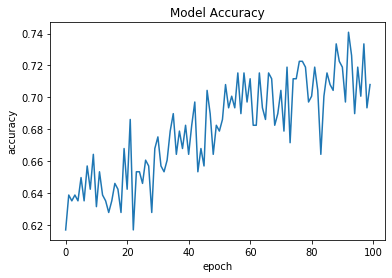

In [733]:
plt.plot(history_nos.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [734]:
y_pred = model_nos.predict_classes(x_test_nos)
# y_test_int = np.argmax(y_test, axis = 1)
f1_score(y_test, y_pred, average='micro')

0.5254237288135594

In [509]:
x_test.shape

(79, 12)

In [738]:
y_pred = model_nos.predict_classes(x_test_nos)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64        66
           1       0.43      0.25      0.32        52

    accuracy                           0.53       118
   macro avg       0.50      0.50      0.48       118
weighted avg       0.50      0.53      0.50       118



In [739]:
print(f'Accuracy score for NN model: {accuracy_score(y_test, y_pred):.2f}')

Accuracy score for NN model: 0.53


### With sentiment

In [740]:
X_with_sentiment = X
X_with_sentiment

,Age,AccountWeeks,AvgRides,AvgSpend,Gender_Male,Subscription_Yes,LastRating_1,LastRating_2,LastRating_3,LastRating_4,LastReview_neg,LastReview_neu
0,0.271429,0.699552,0.848485,0.778351,0,1,0,0,0,1,0,1
1,0.214286,0.040359,0.424242,0.984536,1,0,0,1,0,0,0,0
2,0.742857,0.286996,0.212121,0.907216,0,0,0,0,1,0,1,0
3,0.357143,0.363229,0.606061,0.505155,0,0,1,0,0,0,1,0
4,0.400000,0.421525,0.545455,0.180412,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.928571,0.511211,0.848485,0.221649,0,0,0,1,0,0,0,0
388,0.271429,0.430493,0.727273,0.123711,1,0,0,0,0,0,1,0
389,0.428571,0.358744,0.606061,0.742268,0,0,0,0,0,0,1,0
390,0.585714,0.511211,0.272727,0.061856,0,0,0,0,1,0,0,0


In [741]:
x_train_s,x_test_s,y_train,y_test = train_test_split(X_with_sentiment,Y,test_size=0.2, random_state=42)

## Trying sklearn

In [257]:
t = [('cat', OneHotEncoder(), categorical_ix), 
     ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [258]:
t_2 = [('cat', OneHotEncoder(), categorical_ix), 
     ('num', MinMaxScaler(), numerical_ix)]
col_transform_2 = ColumnTransformer(transformers=t_2)

In [742]:
model_nn = MLPClassifier(activation='tanh', solver='adam')
model_nn.fit(x_train_s, y_train)
y_pred = model_nn.predict(x_test_s)

In [743]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71        45
           1       0.55      0.18      0.27        34

    accuracy                           0.58        79
   macro avg       0.57      0.53      0.49        79
weighted avg       0.57      0.58      0.52        79



In [744]:
print(f'Accuracy score for MLPClassifier: {accuracy_score(y_test, y_pred):.2f}')

Accuracy score for MLPClassifier: 0.58


In [745]:
model_nb = MultinomialNB()
model_nb.fit(x_train_s, y_train)
y_pred_nb = model_nb.predict(x_test_s)
print(f'Accuracy score for Multinomial Naive Bayes model: {accuracy_score(y_test, y_pred_nb):.2f}')

Accuracy score for Multinomial Naive Bayes model: 0.57


In [746]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.57      0.96      0.72        45
           1       0.50      0.06      0.11        34

    accuracy                           0.57        79
   macro avg       0.54      0.51      0.41        79
weighted avg       0.54      0.57      0.45        79



In [750]:
logistic_s = LogisticRegression(solver='lbfgs')
logistic_s.fit(x_train_s, y_train)
y_pred_logistic_s = logistic_s.predict(x_test_s)

In [751]:
print(classification_report(y_test, y_pred_logistic_s))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        45
           1       0.71      0.15      0.24        34

    accuracy                           0.61        79
   macro avg       0.66      0.55      0.49        79
weighted avg       0.65      0.61      0.52        79



In [689]:
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train_s, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test_s)
print (classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.56      0.93      0.70        45
           1       0.25      0.03      0.05        34

    accuracy                           0.54        79
   macro avg       0.41      0.48      0.38        79
weighted avg       0.43      0.54      0.42        79



## Trying Keras

In [59]:
x_train.shape[1]

12

In [752]:
model = Sequential()
model.add(Dense(16, input_dim=x_train_s.shape[1], activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_41 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_42 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [753]:
t_start = time.time()

history = model.fit(x_train_s, y_train,
                   epochs=100, batch_size=200)

t_end = time.time()
print(f'Model took {t_end-t_start} seconds to train.')

Epoch 1/100
313/313 [==============================] - 0s 550us/step - loss: 0.7377 - accuracy: 0.4505
Epoch 2/100
313/313 [==============================] - 0s 11us/step - loss: 0.7420 - accuracy: 0.4473
Epoch 3/100
313/313 [==============================] - 0s 11us/step - loss: 0.7327 - accuracy: 0.4601
Epoch 4/100
313/313 [==============================] - 0s 11us/step - loss: 0.7148 - accuracy: 0.5048
Epoch 5/100
313/313 [==============================] - 0s 12us/step - loss: 0.7110 - accuracy: 0.4952
Epoch 6/100
313/313 [==============================] - 0s 11us/step - loss: 0.7049 - accuracy: 0.5240
Epoch 7/100
313/313 [==============================] - 0s 11us/step - loss: 0.6965 - accuracy: 0.5176
Epoch 8/100
313/313 [==============================] - 0s 12us/step - loss: 0.7013 - accuracy: 0.5208
Epoch 9/100
313/313 [==============================] - 0s 10us/step - loss: 0.6978 - accuracy: 0.5527
Epoch 10/100
313/313 [==============================] - 0s 11us/step - loss: 0.67

313/313 [==============================] - 0s 12us/step - loss: 0.6376 - accuracy: 0.6294
Epoch 81/100
313/313 [==============================] - 0s 11us/step - loss: 0.6555 - accuracy: 0.6102
Epoch 82/100
313/313 [==============================] - 0s 13us/step - loss: 0.6414 - accuracy: 0.6166
Epoch 83/100
313/313 [==============================] - 0s 13us/step - loss: 0.6398 - accuracy: 0.6358
Epoch 84/100
313/313 [==============================] - 0s 12us/step - loss: 0.6481 - accuracy: 0.6294
Epoch 85/100
313/313 [==============================] - 0s 16us/step - loss: 0.6447 - accuracy: 0.6230
Epoch 86/100
313/313 [==============================] - 0s 16us/step - loss: 0.6513 - accuracy: 0.6326
Epoch 87/100
313/313 [==============================] - 0s 12us/step - loss: 0.6427 - accuracy: 0.6422
Epoch 88/100
313/313 [==============================] - 0s 11us/step - loss: 0.6439 - accuracy: 0.6262
Epoch 89/100
313/313 [==============================] - 0s 14us/step - loss: 0.6446 - 

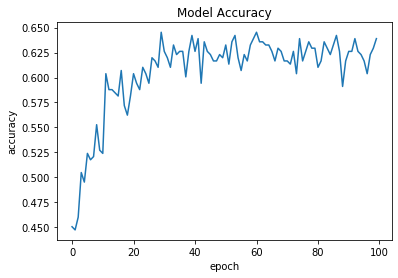

In [754]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [537]:
y_pred = model.predict_classes(x_test_s)
# y_test_int = np.argmax(y_test, axis = 1)
f1_score(y_test, y_pred, average='micro')

0.5569620253164557

In [417]:
x_test.shape

(79, 12)

In [755]:
y_pred = model.predict_classes(x_test_s)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        45
           1       1.00      0.03      0.06        34

    accuracy                           0.58        79
   macro avg       0.79      0.51      0.39        79
weighted avg       0.76      0.58      0.44        79



In [756]:
print(f'Accuracy score for NN model: {accuracy_score(y_test, y_pred):.2f}')

Accuracy score for NN model: 0.58


In [261]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [612]:
X = data.drop(['Reviews', 'Churn'], axis=1)
Y = data['Churn']

In [583]:
X_cat

,Gender_Male,Subscription_Yes,LastRating_1,LastRating_2,LastRating_3,LastRating_4,LastReview_neg,LastReview_neu,idx
0,0,1,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,1,0,2
3,0,0,1,0,0,0,1,0,3
4,1,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...
387,0,0,0,1,0,0,0,0,387
388,1,0,0,0,0,0,1,0,388
389,0,0,0,0,0,0,1,0,389
390,0,0,0,0,1,0,0,0,390


In [614]:
X = pd.concat([X, X_cat[['LastRating_1', 'LastRating_2', 'LastRating_3', 'LastRating_4']]], axis=1)
X.drop('LastRating', axis=1, inplace=True)
X

,Gender,Age,AccountWeeks,Subscription,AvgRides,AvgSpend,LastReview,LastRating_1,LastRating_2,LastRating_3,LastRating_4
0,Female,26,157,Yes,29,156,neu,0,0,0,1
1,Male,22,10,No,15,196,pos,0,1,0,0
2,Female,59,65,No,8,181,neg,0,0,1,0
3,Female,32,82,No,21,103,neg,1,0,0,0
4,Male,35,95,No,19,40,pos,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,Female,72,115,No,29,48,pos,0,1,0,0
388,Male,26,97,No,25,29,neg,0,0,0,0
389,Female,37,81,No,21,149,neg,0,0,0,0
390,Female,48,115,No,10,17,pos,0,0,1,0


In [543]:
X['LastRating'] = X['LastRating'].astype('str')

In [615]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
Gender          392 non-null object
Age             392 non-null int64
AccountWeeks    392 non-null int64
Subscription    392 non-null object
AvgRides        392 non-null int64
AvgSpend        392 non-null int64
LastReview      392 non-null object
LastRating_1    392 non-null uint8
LastRating_2    392 non-null uint8
LastRating_3    392 non-null uint8
LastRating_4    392 non-null uint8
dtypes: int64(4), object(3), uint8(4)
memory usage: 23.1+ KB


In [648]:
X['LastRating_1'] = X['LastRating_1'].astype('int64')
X['LastRating_2'] = X['LastRating_2'].astype('int64')
X['LastRating_3'] = X['LastRating_3'].astype('int64')
X['LastRating_4'] = X['LastRating_4'].astype('int64')

In [649]:
X

,Gender,Age,AccountWeeks,Subscription,AvgRides,AvgSpend,LastReview,LastRating_1,LastRating_2,LastRating_3,LastRating_4
0,Female,26,157,Yes,29,156,neu,0,0,0,1
1,Male,22,10,No,15,196,pos,0,1,0,0
2,Female,59,65,No,8,181,neg,0,0,1,0
3,Female,32,82,No,21,103,neg,1,0,0,0
4,Male,35,95,No,19,40,pos,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,Female,72,115,No,29,48,pos,0,1,0,0
388,Male,26,97,No,25,29,neg,0,0,0,0
389,Female,37,81,No,21,149,neg,0,0,0,0
390,Female,48,115,No,10,17,pos,0,0,1,0


In [650]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
Gender          392 non-null object
Age             392 non-null int64
AccountWeeks    392 non-null int64
Subscription    392 non-null object
AvgRides        392 non-null int64
AvgSpend        392 non-null int64
LastReview      392 non-null object
LastRating_1    392 non-null int64
LastRating_2    392 non-null int64
LastRating_3    392 non-null int64
LastRating_4    392 non-null int64
dtypes: int64(8), object(3)
memory usage: 33.8+ KB


In [651]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [652]:
categorical_columns = ['Gender', 'Subscription', 'LastRating_1', 'LastRating_2', 'LastRating_3', 'LastRating_4', 'LastReview']
numerical_columns = ['Age', 'AccountWeeks', 'AvgRides', 'AvgSpend']

In [653]:
feature_columns = []

for feature_name in categorical_columns:
    vocabulary = x_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in numerical_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [644]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        
        if shuffle:
            ds = ds.shuffle(1000)
            
        ds = ds.batch(batch_size).repeat(num_epochs)
        
        return ds
    
    return input_function

In [654]:
def make_input_fn(df):
    def pandas_to_tf(pdcol):
    # convert the pandas column values to float
        t = tf.constant(pdcol.astype('float32').values)
    # take the column which is of shape (N) and make it (N, 1)
        return tf.expand_dims(t, -1)

    def input_fn():
    # create features, columns
        features = {k: pandas_to_tf(df[k]) for k in FEATURES}
        labels = tf.constant(df[TARGET].values)
        return features, labels
    return input_fn

def make_feature_cols():
    input_columns = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]
    return input_columns

In [655]:
train_input_fn = make_input_fn(x_train, y_train)
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

TypeError: make_input_fn() takes 1 positional argument but 2 were given

In [646]:
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column([feature_columns[2]])])(feature_batch).numpy()

IndexError: list index out of range

In [647]:
tf.keras.layers.DenseFeatures([feature_columns[2]])(feature_batch).numpy()

IndexError: list index out of range

In [621]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s1/r6h4z6p93731tv7xgdlv55t40000gn/T/tmp5cs1g473', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


UnimplementedError: Cast string to float is not supported
	 [[node head/losses/Cast (defined at /Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py:258) ]]

Errors may have originated from an input operation.
Input Source operations connected to node head/losses/Cast:
 head/losses/labels (defined at /Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/base_head.py:469)

Original stack trace for 'head/losses/Cast':
  File "/Users/zhen/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-621-609ce7b7bdd0>", line 2, in <module>
    linear_est.train(train_input_fn)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 349, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1182, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1211, in _train_model_default
    self.config)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1170, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 943, in _model_fn
    sparse_combiner=sparse_combiner)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 684, in _linear_model_fn_v2
    logits=logits)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/base_head.py", line 292, in create_estimator_spec
    regularization_losses=regularization_losses))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 567, in _create_tpu_estimator_spec
    regularization_losses=regularization_losses)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 288, in loss
    labels = self._processed_labels(logits, labels)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 258, in _processed_labels
    labels = tf.cast(labels, dtype=tf.dtypes.float32)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 789, in cast
    x = gen_math_ops.cast(x, base_type, name=name)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1978, in cast
    "Cast", x=x, DstT=DstT, Truncate=Truncate, name=name)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 744, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3327, in _create_op_internal
    op_def=op_def)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1791, in __init__
    self._traceback = tf_stack.extract_stack()


In [557]:
age = tf.feature_column.numeric_column('Age')
account_weeks = tf.feature_column.numeric_column('AccountWeeks')
avg_rides = tf.feature_column.numeric_column('AvgRides')
avg_spend = tf.feature_column.numeric_column('AvgSpend')

In [546]:
col_unique_val_counts = []
cat_columns = []
for col in X.columns:
    if X[col].dtype.name != 'object':
        continue
    unique_vals = X[col].unique()
    col_unique_val_counts.append(len(unique_vals))
    cat_columns.append(col)
    
    print(col, '->', unique_vals)

Gender -> ['Female' 'Male']
Subscription -> ['Yes' 'No']
LastRating -> ['4' '2' '3' '1' '5']
LastReview -> ['neu' 'pos' 'neg']


In [549]:
cat_cols = [tf.feature_column.categorical_column_with_hash_bucket(col, hash_bucket_size=size)
           for col, size in zip(cat_columns, col_unique_val_counts)]

In [560]:
num_cols = [age, account_weeks, avg_rides, avg_spend]
feature_columns = num_cols + cat_cols

In [561]:
n_classes = 2
batch_size = 100

In [562]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, y=y_train,
                                                batch_size=batch_size,
                                                num_epochs=1000,
                                                shuffle=True)

In [563]:
linear_model = tf.estimator.LinearClassifier(feature_columns=feature_columns,
                                            n_classes=n_classes)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s1/r6h4z6p93731tv7xgdlv55t40000gn/T/tmpyn52azyt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [564]:
linear_model.train(input_fn=input_func, steps=10000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/s1/r6h4z6p93731tv7xgdlv55t40000gn/T/tmpyn52azyt/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


UnimplementedError: Cast string to float is not supported
	 [[node head/losses/Cast (defined at /Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py:258) ]]

Errors may have originated from an input operation.
Input Source operations connected to node head/losses/Cast:
 head/losses/labels (defined at /Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/base_head.py:469)

Original stack trace for 'head/losses/Cast':
  File "/Users/zhen/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-564-c2302a67c05e>", line 1, in <module>
    linear_model.train(input_fn=input_func, steps=10000)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 349, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1182, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1211, in _train_model_default
    self.config)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1170, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 943, in _model_fn
    sparse_combiner=sparse_combiner)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 684, in _linear_model_fn_v2
    logits=logits)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/base_head.py", line 292, in create_estimator_spec
    regularization_losses=regularization_losses))
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 567, in _create_tpu_estimator_spec
    regularization_losses=regularization_losses)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 288, in loss
    labels = self._processed_labels(logits, labels)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/head/binary_class_head.py", line 258, in _processed_labels
    labels = tf.cast(labels, dtype=tf.dtypes.float32)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 789, in cast
    x = gen_math_ops.cast(x, base_type, name=name)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1978, in cast
    "Cast", x=x, DstT=DstT, Truncate=Truncate, name=name)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 744, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3327, in _create_op_internal
    op_def=op_def)
  File "/Users/zhen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1791, in __init__
    self._traceback = tf_stack.extract_stack()
